In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('C:/Users/SRISTI/Desktop/practice text doc/wine quality.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## EDA

In [3]:
ds=data.copy()    # making a copy of data so that could not lost data by mistake

In [4]:
ds.shape

(1599, 12)

In [5]:
ds.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
ds.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
ds.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [9]:
ds.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [10]:
ds.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Univariate Analysis

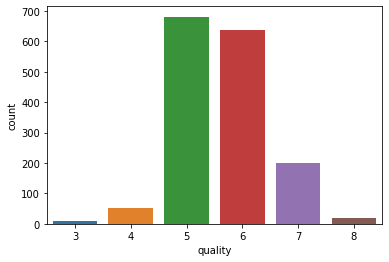

In [11]:
sns.countplot(ds['quality'])

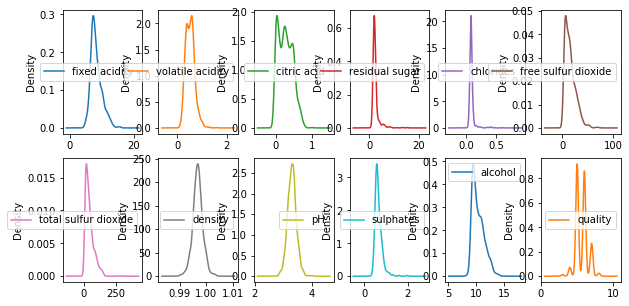

In [12]:
ds.plot(kind='density',subplots=True, layout=(2,6),figsize=(10,5),sharex=False)
plt.show()

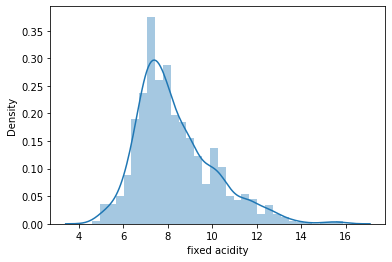

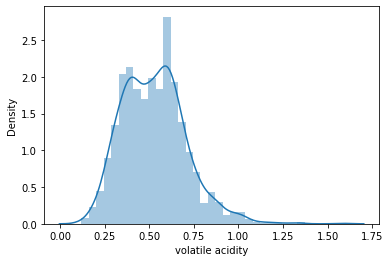

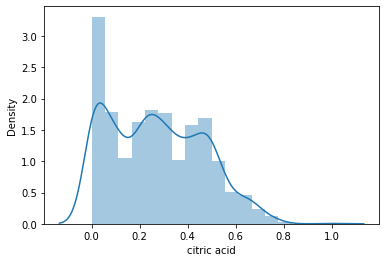

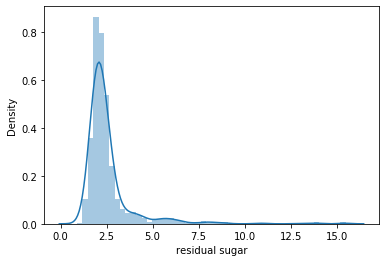

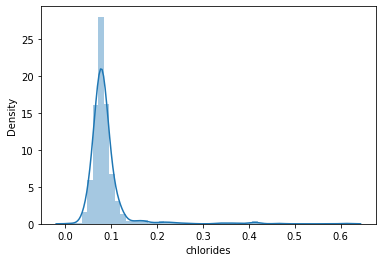

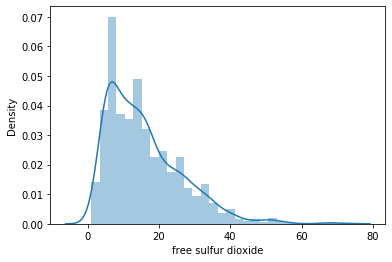

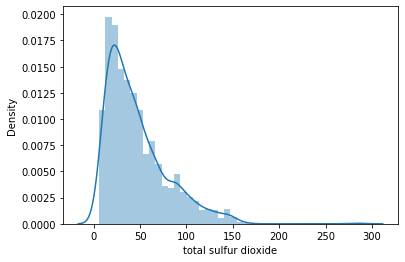

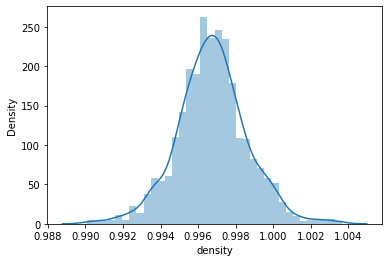

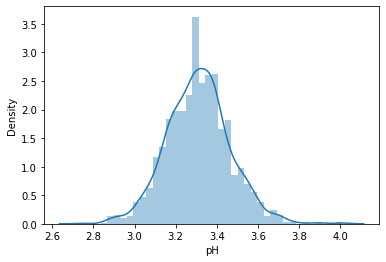

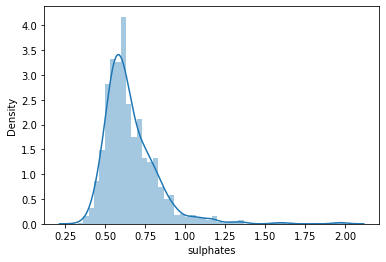

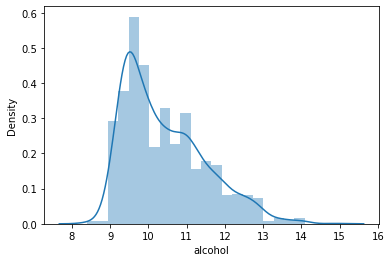

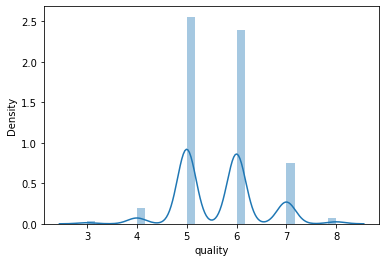

In [13]:
for i in ds.columns:
    plt.figure()
    sns.distplot(ds[i])

### Bivariate Analysis

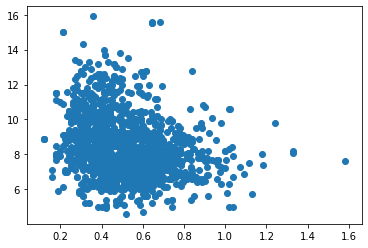

In [14]:
plt.scatter(ds['volatile acidity'],ds['fixed acidity'])
plt.show()

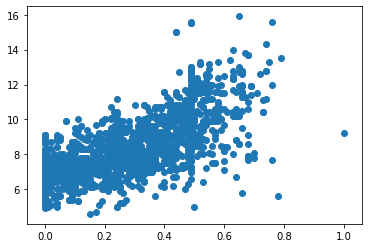

In [15]:
plt.scatter(ds['citric acid'],ds['fixed acidity'])
plt.show()

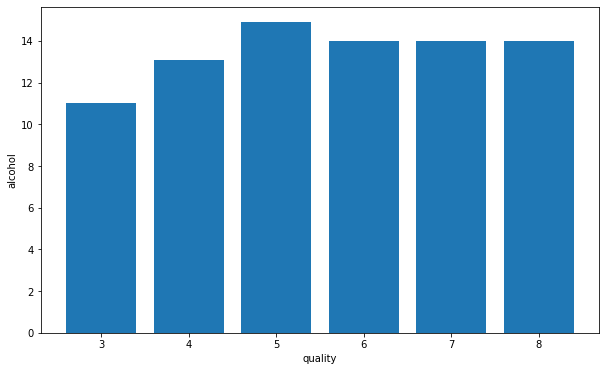

In [16]:
plt.figure(figsize=[10,6])
plt.bar(ds['quality'],ds['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

### Multivariate Analysis

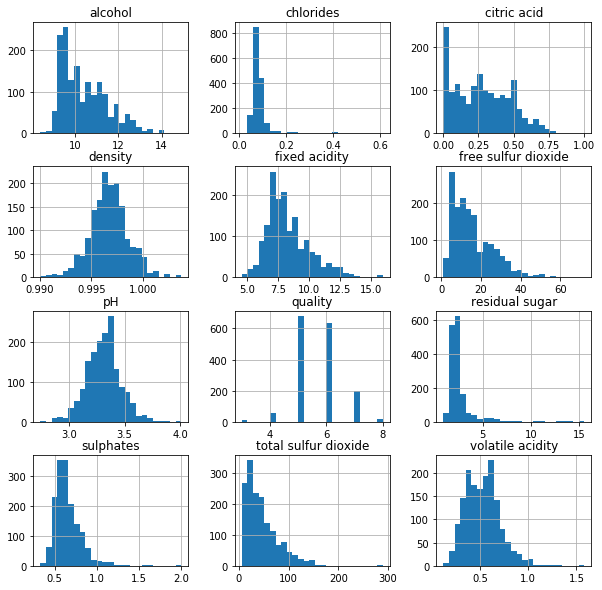

In [17]:
ds.hist(bins=25,figsize=(10,10))
plt.show()

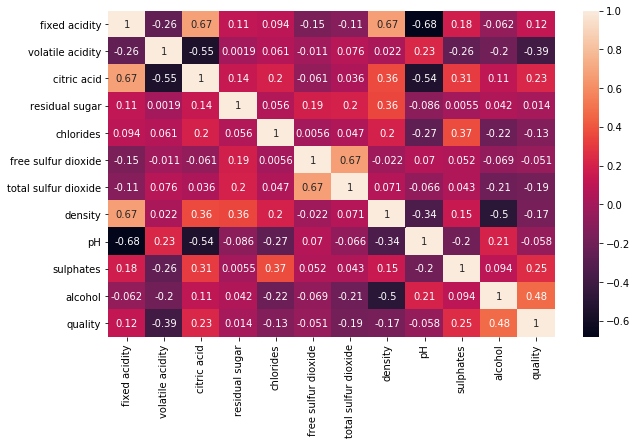

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(ds.corr(),annot=True)

In [19]:
wds=ds.drop('total sulfur dioxide',axis=1)

In [20]:
wds

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5


In [21]:
 wds['quality']=[1 if x>=7 else 0 for x in wds.quality]

In [22]:
wds.quality.unique()

array([0, 1], dtype=int64)

In [23]:
wds.quality.value_counts()

0    1382
1     217
Name: quality, dtype: int64

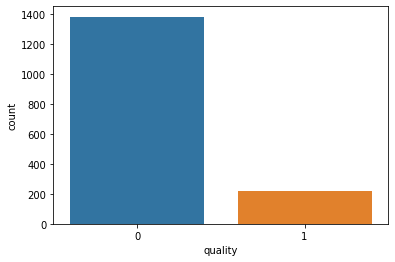

In [24]:
sns.countplot(wds['quality'])

### Checking for outliers

In [25]:
w1=wds.copy()

In [26]:
w1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,0


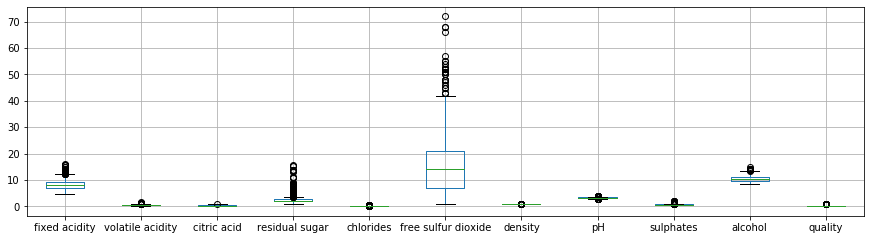

In [27]:
w1.boxplot(figsize=[15,5])
plt.subplots_adjust(bottom=.30)
plt.show()

### Checking for skewness

In [28]:
w1.skew()

fixed acidity          0.982751
volatile acidity       0.671593
citric acid            0.318337
residual sugar         4.540655
chlorides              5.680347
free sulfur dioxide    1.250567
density                0.071288
pH                     0.193683
sulphates              2.428672
alcohol                0.860829
quality                2.129363
dtype: float64

### Capping the outliers using IQR

In [29]:
def iqr_cap(df,cols,factor):
    for col in cols:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        iqr=q3-q1
        up_wsk=q3+(factor*iqr)
        lw_wsk=q1-(factor*iqr)
        df[col]=np.where(df[col]>up_wsk, up_wsk, np.where(df[col]<lw_wsk, lw_wsk, df[col]))

In [30]:
w2=w1.iloc[:,0:-1]

In [31]:
iqr_cap(w2,w2.columns,1.5)

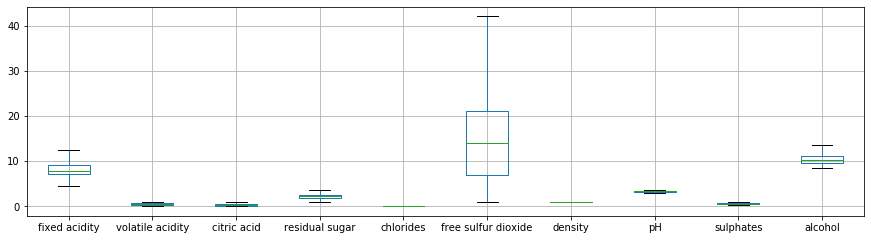

In [32]:
w2.boxplot(figsize=[15,5])
plt.subplots_adjust(bottom=.30)
plt.show()

In [33]:
w2.skew()

fixed acidity          0.700363
volatile acidity       0.420928
citric acid            0.309850
residual sugar         0.856682
chlorides              0.431683
free sulfur dioxide    0.858967
density                0.025021
pH                     0.054017
sulphates              0.782787
alcohol                0.795429
dtype: float64

In [34]:
# removing the skewness

In [35]:
from sklearn.preprocessing import PowerTransformer

In [36]:
list1=['fixed acidity','residual sugar','free sulfur dioxide','sulphates','alcohol']

pt=PowerTransformer(method='box-cox',standardize=True)

for i in list1:
    w2[i]=pt.fit_transform(w2[i].values.reshape(-1,1))

In [37]:
w2.skew()

fixed acidity          0.006999
volatile acidity       0.420928
citric acid            0.309850
residual sugar         0.001575
chlorides              0.431683
free sulfur dioxide   -0.033609
density                0.025021
pH                     0.054017
sulphates              0.011288
alcohol                0.108939
dtype: float64

In [38]:
w2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
0,-0.455297,0.700,0.00,-0.648742,0.076,-0.278234,0.99780,3.51,-0.598666,-1.075245
1,-0.173303,0.880,0.00,0.616059,0.098,1.011329,0.99680,3.20,0.382751,-0.501710
2,-0.173303,0.760,0.04,0.140579,0.092,0.184864,0.99700,3.26,0.164471,-0.501710
3,1.584191,0.280,0.56,-0.648742,0.075,0.379820,0.99800,3.16,-0.412976,-0.501710
4,-0.455297,0.700,0.00,-0.648742,0.076,-0.278234,0.99780,3.51,-0.598666,-1.075245
...,...,...,...,...,...,...,...,...,...,...
1594,-1.456736,0.600,0.08,-0.430838,0.090,1.441194,0.99490,3.45,-0.412976,0.292141
1595,-1.752982,0.550,0.10,-0.037690,0.062,1.800917,0.99512,3.52,0.896962,0.889304
1596,-1.362652,0.510,0.13,0.140579,0.076,1.267294,0.99574,3.42,0.837460,0.735022
1597,-1.752982,0.645,0.12,-0.430838,0.075,1.441194,0.99547,3.57,0.586305,-0.019796


### Spliting data into train and test

In [39]:
x=w2

In [40]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
0,-0.455297,0.70,0.00,-0.648742,0.076,-0.278234,0.9978,3.51,-0.598666,-1.075245
1,-0.173303,0.88,0.00,0.616059,0.098,1.011329,0.9968,3.20,0.382751,-0.501710
2,-0.173303,0.76,0.04,0.140579,0.092,0.184864,0.9970,3.26,0.164471,-0.501710
3,1.584191,0.28,0.56,-0.648742,0.075,0.379820,0.9980,3.16,-0.412976,-0.501710
4,-0.455297,0.70,0.00,-0.648742,0.076,-0.278234,0.9978,3.51,-0.598666,-1.075245


In [41]:
x.shape

(1599, 10)

In [42]:
y=w1.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [43]:
y.shape

(1599,)

In [44]:
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
ms=MinMaxScaler()

In [47]:
x=ms.fit_transform(x)

In [48]:
x=pd.DataFrame(x,columns=w2.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
0,0.540176,0.648045,0.000000,0.602875,0.4500,0.555792,0.621085,0.769737,0.557233,0.390051
1,0.592791,0.849162,0.000000,0.806685,0.7250,0.814114,0.509228,0.361842,0.722416,0.501908
2,0.592791,0.715084,0.043716,0.730066,0.6500,0.648559,0.531600,0.440789,0.685677,0.501908
3,0.920708,0.178771,0.612022,0.602875,0.4375,0.687612,0.643456,0.309211,0.588486,0.501908
4,0.540176,0.648045,0.000000,0.602875,0.4500,0.555792,0.621085,0.769737,0.557233,0.390051
...,...,...,...,...,...,...,...,...,...,...
1594,0.353325,0.536313,0.087432,0.637988,0.6250,0.900224,0.296700,0.690789,0.588486,0.656733
1595,0.298051,0.480447,0.109290,0.701340,0.2750,0.972282,0.321309,0.782895,0.808963,0.773198
1596,0.370880,0.435754,0.142077,0.730066,0.4500,0.865388,0.390660,0.651316,0.798948,0.743108
1597,0.298051,0.586592,0.131148,0.637988,0.4375,0.900224,0.360459,0.848684,0.756676,0.595896


## Handling the class imbalance problem by oversampling the minority class

In [49]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [50]:
x_over,y_over=sm.fit_resample(x,y)

In [51]:
y_over.value_counts()

1    1382
0    1382
Name: quality, dtype: int64

In [52]:
x=x_over
y=y_over

### Finding the best random state

In [54]:
maxacc=0
maxrs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    acc_sc=accuracy_score(y_test,pred)
    if acc_sc>maxacc:
        maxacc=acc_sc
        maxrs=i
print('best acc_sc is:',maxacc,' at random state', maxrs)

best acc_sc is: 0.9326765188834154  at random state 45


In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)

In [56]:
x_train.shape

(2155, 10)

In [57]:
y_train.shape

(2155,)

In [58]:
x_test.shape

(609, 10)

In [59]:
y_test.shape

(609,)

## Model Training

In [60]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
sv=SVC()
gnb=GaussianNB()
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()

In [61]:
model=[lg,dtc,knn,sv,gnb,rfc,ad]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy score:',m)
    print('accuracy_score',accuracy_score(y_test,pred))
    print('confusion_matrix',confusion_matrix(y_test,pred))
    print('classification_report',classification_report(y_test,pred))
    cvscore=cross_val_score(m,x,y,cv=5)
    print(cvscore.mean())
    print('\n')

accuracy score: LogisticRegression()
accuracy_score 0.8423645320197044
confusion_matrix [[225  60]
 [ 36 288]]
classification_report               precision    recall  f1-score   support

           0       0.86      0.79      0.82       285
           1       0.83      0.89      0.86       324

    accuracy                           0.84       609
   macro avg       0.84      0.84      0.84       609
weighted avg       0.84      0.84      0.84       609

0.8122375972953849


accuracy score: DecisionTreeClassifier()
accuracy_score 0.9293924466338259
confusion_matrix [[266  19]
 [ 24 300]]
classification_report               precision    recall  f1-score   support

           0       0.92      0.93      0.93       285
           1       0.94      0.93      0.93       324

    accuracy                           0.93       609
   macro avg       0.93      0.93      0.93       609
weighted avg       0.93      0.93      0.93       609

0.8621563540110596


accuracy score: KNeighborsClassifi

### Hyperparameter Tunning Using Grid Search CV

In [62]:
# for support vector classifier
parameters={'kernel':['linear','rbf','poly','sigmoid'],'C':[1,10]}
gs=GridSearchCV(sv,parameters,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [63]:
gs.best_score_

0.9039443155452437

In [64]:
gs.best_params_

{'C': 10, 'kernel': 'rbf'}

In [65]:
# for logistic regression
parameters={'C':np.arange(1,5),'penalty':['l1','l2','elasticnet']}
gs=GridSearchCV(lg,parameters)
gs.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1, 2, 3, 4]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [66]:
gs.best_score_

0.8269141531322506

In [67]:
gs.best_params_

{'C': 3, 'penalty': 'l2'}

In [68]:
# for decision tree classifier
parameter={'max_depth':np.arange(1,20),'criterion':['gini','entropy'],'splitter':['best','random']}

gs=GridSearchCV(dtc,parameter,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'splitter': ['best', 'random']})

In [69]:
gs.best_score_

0.8955916473317865

In [70]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 15, 'splitter': 'random'}

In [71]:
# for knearest neighbors
parameter={'n_neighbors':np.arange(2,8)}

gs=GridSearchCV(knn,parameter,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7])})

In [72]:
gs.best_score_

0.9415313225058004

In [73]:
gs.best_params_

{'n_neighbors': 2}

In [74]:
# random forest classifier
parameter={'n_estimators':(100,150,200),'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2']}

gs=GridSearchCV(rfc,parameter,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': (100, 150, 200)})

In [75]:
gs.best_score_

0.9406032482598607

In [76]:
gs.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 150}

### Model Training Again

In [77]:
# for DTC
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=15,splitter='random')
dtc.fit(x_train,y_train)
preddt=dtc.predict(x_test)
print('accuracy_score',accuracy_score(y_test,preddt))
print('confusion_matrix',confusion_matrix(y_test,preddt))
print('classification_report',classification_report(y_test,preddt))

accuracy_score 0.8998357963875205
confusion_matrix [[247  38]
 [ 23 301]]
classification_report               precision    recall  f1-score   support

           0       0.91      0.87      0.89       285
           1       0.89      0.93      0.91       324

    accuracy                           0.90       609
   macro avg       0.90      0.90      0.90       609
weighted avg       0.90      0.90      0.90       609



In [78]:
# for knn
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
predkn=knn.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predkn))
print('confusion_matrix',confusion_matrix(y_test,predkn))
print('classification_report',classification_report(y_test,predkn))


accuracy_score 0.9573070607553367
confusion_matrix [[264  21]
 [  5 319]]
classification_report               precision    recall  f1-score   support

           0       0.98      0.93      0.95       285
           1       0.94      0.98      0.96       324

    accuracy                           0.96       609
   macro avg       0.96      0.96      0.96       609
weighted avg       0.96      0.96      0.96       609



In [79]:
# for SVC
svc=SVC(kernel='rbf',C=10,probability=True)
svc.fit(x_train,y_train)
predsv=svc.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predsv))
print('confusion_matrix',confusion_matrix(y_test,predsv))
print('classification_report',classification_report(y_test,predsv))

accuracy_score 0.9146141215106732
confusion_matrix [[250  35]
 [ 17 307]]
classification_report               precision    recall  f1-score   support

           0       0.94      0.88      0.91       285
           1       0.90      0.95      0.92       324

    accuracy                           0.91       609
   macro avg       0.92      0.91      0.91       609
weighted avg       0.92      0.91      0.91       609



In [80]:
# RFC
rfc=RandomForestClassifier(n_estimators=150,criterion='gini',max_features='sqrt')
rfc.fit(x_train,y_train)
predrf=rfc.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predrf))
print('confusion_matrix',confusion_matrix(y_test,predrf))
print('classification_report',classification_report(y_test,predrf))

accuracy_score 0.9490968801313628
confusion_matrix [[265  20]
 [ 11 313]]
classification_report               precision    recall  f1-score   support

           0       0.96      0.93      0.94       285
           1       0.94      0.97      0.95       324

    accuracy                           0.95       609
   macro avg       0.95      0.95      0.95       609
weighted avg       0.95      0.95      0.95       609



### AUC-ROC Curve and Score

In [81]:
from sklearn.metrics import roc_curve

from sklearn.metrics import roc_auc_score

In [82]:
# for decision tree classifier

pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

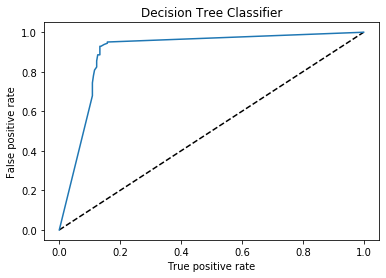

In [83]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('Decision Tree Classifier')
plt.show()

In [84]:
auc_score=roc_auc_score(y_test,preddt)
auc_score

0.8978395061728395

In [85]:
# for random forest classifier

pred_prob=rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

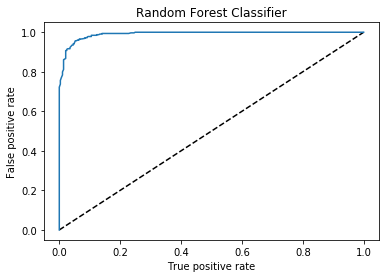

In [86]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('Random Forest Classifier')
plt.show()

In [87]:
auc_score=roc_auc_score(y_test,predrf)
auc_score

0.9479369720597791

In [88]:
# for KNearest neighbors classifier

pred_prob=knn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

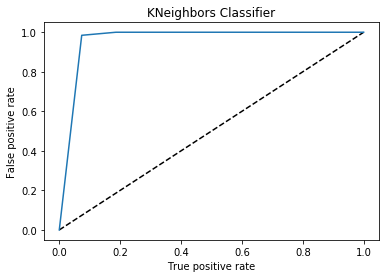

In [89]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighbors Classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('KNeighbors Classifier')
plt.show()

In [90]:
auc_score=roc_auc_score(y_test,predkn)
auc_score

0.9554418453541261

In [91]:
# for support vector classifier
pred_prob=svc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

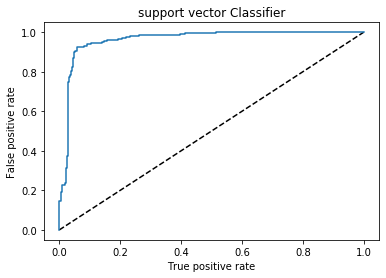

In [92]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='support vector Classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('support vector Classifier')
plt.show()

In [93]:
auc_score=roc_auc_score(y_test,predsv)
auc_score

0.9123619233268356

### Saving the Model

In [94]:
import joblib

In [95]:
joblib.dump(knn,'winequality_knn.obj')

['winequality_knn.obj']